In [1]:
import torch

In [2]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
words=open('names.txt','r').read().splitlines()

In [4]:
words[:8]

['Aamir', 'Aaron', 'Abbey', 'Abbie', 'Abbot', 'Abbott', 'Abby', 'Abdel']

## Cleaning of Data

In [5]:
#Remove spaces
for w in words:
    w.strip()

In [6]:
len(words)

7945

In [7]:
for w in words:
    if ' '  in w:
        print(w)
   

Dee Dee
Gale 
Jo Ann
Zsa Zsa


In [17]:
words = [w.replace(" ", "") for w in words]
words=[w.replace("-","")for w in words]
words = [w.replace(" ", "") for w in words]
words=[w.replace("'","")for w in words]

In [18]:
for w in words:
    if ' '  in w:
        print(w)

In [19]:
words =[w.lower()for w in words]


In [20]:
import string

In [21]:
remove = string.punctuation

In [22]:
def remove_punc():
    return text.translate(str.maketrans('','',remove))

In [23]:
words[:8]

['aamir', 'aaron', 'abbey', 'abbie', 'abbot', 'abbott', 'abby', 'abdel']

## Creating Vocabulary

In [24]:
chars=sorted(list(set(''.join(words))))
    

In [25]:
stoi={s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


## Building Dataset

In [28]:
block_size=3  #context length
X,Y=[],[]

for w in words[:5]:
    print(w)
    context=[0]*block_size  #padding of'.'
    for ch in w+'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context),'-->',itos[ix])
        context=context[1:]+[ix]  #moving to next context as in moving the context window

X=torch.tensor(X)
Y=torch.tensor(Y)
     

aamir
... --> a
..a --> a
.aa --> m
aam --> i
ami --> r
mir --> .
aaron
... --> a
..a --> a
.aa --> r
aar --> o
aro --> n
ron --> .
abbey
... --> a
..a --> b
.ab --> b
abb --> e
bbe --> y
bey --> .
abbie
... --> a
..a --> b
.ab --> b
abb --> i
bbi --> e
bie --> .
abbot
... --> a
..a --> b
.ab --> b
abb --> o
bbo --> t
bot --> .


In [29]:
X.shape,Y.shape,X.dtype,Y.dtype

(torch.Size([30, 3]), torch.Size([30]), torch.int64, torch.int64)

In [30]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1, 13],
        [ 1, 13,  9],
        [13,  9, 18],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  1],
        [ 1,  1, 18],
        [ 1, 18, 15],
        [18, 15, 14],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  2],
        [ 1,  2,  2],
        [ 2,  2,  5],
        [ 2,  5, 25],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  2],
        [ 1,  2,  2],
        [ 2,  2,  9],
        [ 2,  9,  5],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1,  2],
        [ 1,  2,  2],
        [ 2,  2, 15],
        [ 2, 15, 20]])

In [31]:
Y

tensor([ 1,  1, 13,  9, 18,  0,  1,  1, 18, 15, 14,  0,  1,  2,  2,  5, 25,  0,
         1,  2,  2,  9,  5,  0,  1,  2,  2, 15, 20,  0])

In [32]:
C=torch.randn((27,2))

In [34]:
C[5]

tensor([-0.4156,  0.0569])

In [39]:
C[[5,6,7]]

tensor([[-0.4156,  0.0569],
        [ 0.5149, -0.7104],
        [-0.9375,  1.7879]])

In [40]:
C[X]

tensor([[[-1.5048, -0.4274],
         [-1.5048, -0.4274],
         [-1.5048, -0.4274]],

        [[-1.5048, -0.4274],
         [-1.5048, -0.4274],
         [ 0.1230,  0.5765]],

        [[-1.5048, -0.4274],
         [ 0.1230,  0.5765],
         [ 0.1230,  0.5765]],

        [[ 0.1230,  0.5765],
         [ 0.1230,  0.5765],
         [ 0.7280,  1.0543]],

        [[ 0.1230,  0.5765],
         [ 0.7280,  1.0543],
         [ 0.1601, -1.9778]],

        [[ 0.7280,  1.0543],
         [ 0.1601, -1.9778],
         [-0.1154, -0.9522]],

        [[-1.5048, -0.4274],
         [-1.5048, -0.4274],
         [-1.5048, -0.4274]],

        [[-1.5048, -0.4274],
         [-1.5048, -0.4274],
         [ 0.1230,  0.5765]],

        [[-1.5048, -0.4274],
         [ 0.1230,  0.5765],
         [ 0.1230,  0.5765]],

        [[ 0.1230,  0.5765],
         [ 0.1230,  0.5765],
         [-0.1154, -0.9522]],

        [[ 0.1230,  0.5765],
         [-0.1154, -0.9522],
         [ 1.3734, -0.3326]],

        [[-0.1154, -0

In [41]:
C[X].shape

torch.Size([30, 3, 2])

In [44]:
X[13,2]

tensor(1)

In [45]:
C[X][13,2]

tensor([0.1230, 0.5765])

In [48]:
C[1] # x[13,2]=1--->c[x[31,2]]=c[1]

tensor([0.1230, 0.5765])

In [49]:
emb=C[X]
emb.shape

torch.Size([30, 3, 2])

In [66]:
W1=torch.randn((6,100))
b1=torch.randn(100)

In [69]:
h=torch.tanh(emb.view(-1,6) @ W1+b1)

In [70]:
h

tensor([[-0.9962,  0.9937,  0.9874,  ..., -0.9998,  0.8392,  0.9154],
        [-0.9428,  0.9969,  0.9897,  ..., -0.9996,  0.9744, -0.9764],
        [-0.8291,  0.8451,  0.9939,  ..., -0.9990,  0.9806, -0.9912],
        ...,
        [-0.6351, -0.7618, -0.6119,  ..., -0.8826,  0.8268, -0.9570],
        [-0.3389, -0.9648, -0.9362,  ..., -0.2076,  0.9556, -0.9970],
        [ 0.2449, -0.8344,  0.1523,  ...,  0.0676,  0.9999,  0.9193]])

In [71]:
h.shape

torch.Size([30, 100])

In [72]:
W2=torch.randn((100,27))
b2=torch.randn(27)

In [73]:
logits= h @ W2 + b2

In [74]:
logits.shape

torch.Size([30, 27])

In [75]:
counts=logits.exp()

In [76]:
prob=counts/counts.sum(dim=1,keepdim=True)

In [77]:
prob.shape

torch.Size([30, 27])

In [78]:
prob[0].sum()

tensor(1.0000)

In [79]:
Y

tensor([ 1,  1, 13,  9, 18,  0,  1,  1, 18, 15, 14,  0,  1,  2,  2,  5, 25,  0,
         1,  2,  2,  9,  5,  0,  1,  2,  2, 15, 20,  0])

In [92]:

g=torch.Generator().manual_seed(120)
C=torch.randn((27,2),generator=g)
W1=torch.randn((6,100),generator=g)
b1=torch.randn(100,generator=g)
W2=torch.randn((100,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]




In [93]:
sum(p.nelement() for p in parameters)

3481

In [94]:
emb=C[X]
z= emb.view(-1,6) @ W1+b1
h=torch.tanh(z)
logits=h @ W2+b2
#counts=logits.exp()
#prob=counts/counts.sum(dim=1,keepdims =True)
#loss=-prob[torch.arange(30),Y].log().mean()
F.cross_entropy(logits,Y)
loss

tensor(13.4670)

In [95]:
F.cross_entropy(logits,Y)

tensor(13.4670)

In [96]:
loss=-prob[torch.arange(30),Y].log().mean()

In [97]:
loss

tensor(13.4670)

In [98]:
for p in parameters:
    p.requires_grad=True

In [113]:
#forward pass
for i in range(100):
    emb=C[X]
    h=torch.tanh(emb.view(-1,6) @ W1+b1)
    logits=h @ W2+b2
    loss = F.cross_entropy(logits,Y)
    
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #updating parameters
    for p in parameters:
        p.data+= -0.1 *p.grad

print('The loss is ->' ,loss.item())

The loss is -> 0.26920291781425476


## Running the model on entire Dataset

In [144]:
block_size=3  #context length
X,Y=[],[]

for w in words:
    #print(w)
    context=[0]*block_size  #padding of'.'
    for ch in w+'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context),'-->',itos[ix])
        context=context[1:]+[ix]  #moving to next context as in moving the context window

X=torch.tensor(X)
Y=torch.tensor(Y)
     

In [145]:
X.shape,Y.shape,X.dtype,Y.dtype

(torch.Size([55830, 3]), torch.Size([55830]), torch.int64, torch.int64)

In [190]:

g=torch.Generator().manual_seed(120)
C=torch.randn((27,2),generator=g)
W1=torch.randn((6,100),generator=g)
b1=torch.randn(100,generator=g)
W2=torch.randn((100,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [191]:
for p in parameters:
    p.requires_grad=True

In [192]:
torch.randint(0,X.shape[0],(32,))

tensor([14750,  9554, 55572, 55675, 54171, 26022, 45509, 30026,  1905, 22653,
         3957, 15325, 47190, 26346, 36539, 14331,  1914, 10049, 30613, 36350,
        12714, 33634, 24222, 32579, 29063, 12438, 16139, 47293, 32439,  5704,
        53721, 40840])

In [193]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre


In [194]:
lri=[]
lossi=[]

#forward pass
for i in range(10000):

    #minibatch construct
    ix=torch.randint(0,X.shape[0],(32,))
    emb=C[X[ix]]
    h=torch.tanh(emb.view(-1,6) @ W1+b1)
    logits=h @ W2+b2
    loss = F.cross_entropy(logits,Y[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #updating parameters
    #lr=lrs[i]
    lr=0.1
    for p in parameters:
        p.data+= -lr *p.grad

    #track
    #lri.append(lre[i])
    #lossi.append(loss.item())
print(loss.item())

2.2563555240631104


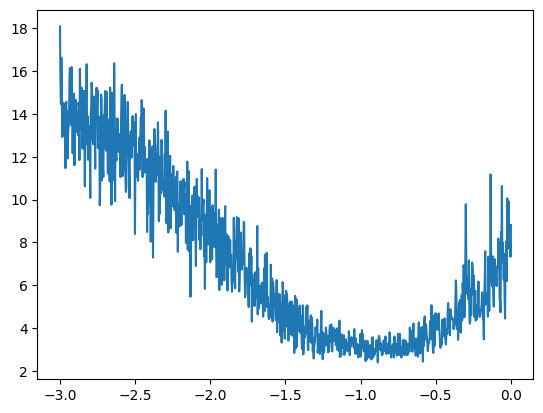

In [157]:
plt.plot(lri,lossi)

## Dividing into train,test and validation split

In [201]:
#training split,dev/validation split,test split
# 80:10:10

def build_dataset(words):
    block_size=3  #context length
    X,Y=[],[]
    
    for w in words:
        #print(w)
        context=[0]*block_size  #padding of'.'
        for ch in w+'.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context),'-->',itos[ix])
            context=context[1:]+[ix]  #moving to next context as in moving the context window
    
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape,Y.shape)
    return X,Y

import random
random.seed(15)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([44696, 3]) torch.Size([44696])
torch.Size([5532, 3]) torch.Size([5532])
torch.Size([5602, 3]) torch.Size([5602])


In [202]:
Xtr.shape,Ytr.shape

(torch.Size([44696, 3]), torch.Size([44696]))

In [203]:

g=torch.Generator().manual_seed(120)
C=torch.randn((27,2),generator=g)
W1=torch.randn((6,100),generator=g)
b1=torch.randn(100,generator=g)
W2=torch.randn((100,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [204]:
for p in parameters:
    p.requires_grad=True

In [205]:
lre=torch.linspace(-3,0,1000)
lrs=10**lre


In [206]:
lri=[]
lossi=[]

#forward pass
for i in range(30000):

    #minibatch construct
    ix=torch.randint(0,Xtr.shape[0],(32,))
    emb=C[Xtr[ix]]
    h=torch.tanh(emb.view(-1,6) @ W1+b1)
    logits=h @ W2+b2
    loss = F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    #updating parameters
    #lr=lrs[i]
    lr=0.01
    for p in parameters:
        p.data+= -lr *p.grad

    #track
    #lri.append(lre[i])
    #lossi.append(loss.item())
print(loss.item())

2.2315621376037598


In [210]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3987, grad_fn=<NllLossBackward0>)

In [208]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4323, grad_fn=<NllLossBackward0>)

In [211]:
#scaling up the nn
g=torch.Generator().manual_seed(120)
C=torch.randn((27,2),generator=g)
W1=torch.randn((6,300),generator=g)
b1=torch.randn(300,generator=g)
W2=torch.randn((300,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]

In [212]:
sum(p.nelement() for p in parameters)

10281

In [213]:
for p in parameters:
  p.requires_grad = True
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [215]:
lri=[]
lossi=[]
stepi=[]

for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1,6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

In [217]:
print(loss.item())

2.310993194580078


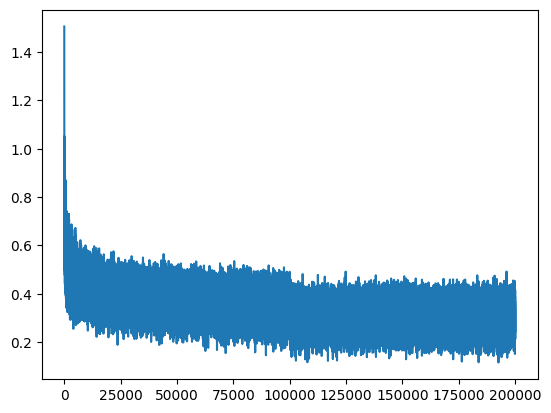

In [216]:

plt.plot(stepi, lossi)

In [218]:
 emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.0381, grad_fn=<NllLossBackward0>)

In [219]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1699, grad_fn=<NllLossBackward0>)

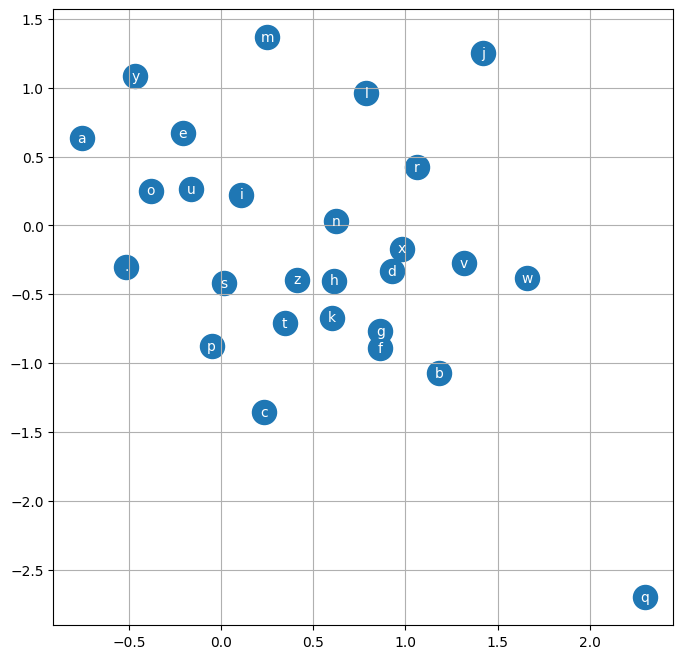

In [220]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=300)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

## Scaling up the parameters

In [223]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [224]:
sum(p.nelement() for p in parameters) # number of parameters in total

11897

In [225]:
for p in parameters:
  p.requires_grad = True

In [226]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [227]:
lri = []
lossi = []
stepi = []

In [228]:
for i in range(200000):
  
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 10)
  h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 100000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

#print(loss.item())

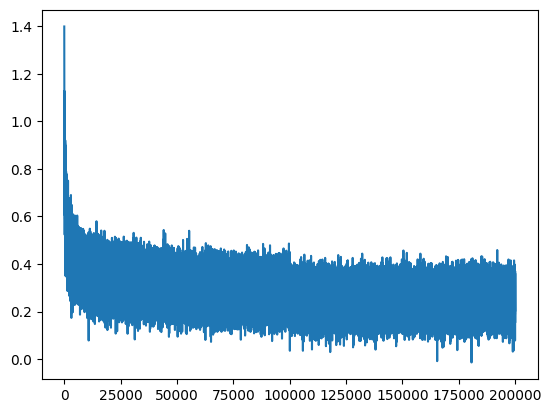

In [229]:
plt.plot(stepi, lossi)

In [230]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(1.8185, grad_fn=<NllLossBackward0>)

In [231]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1449, grad_fn=<NllLossBackward0>)

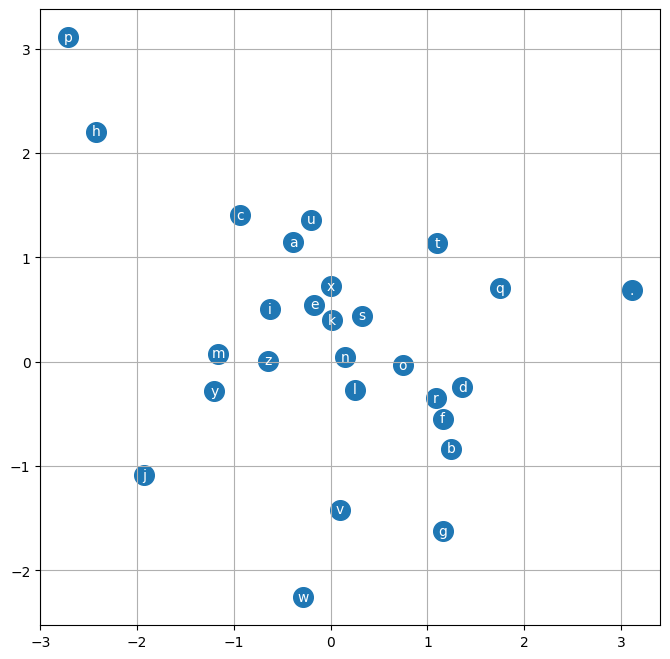

In [232]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [233]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

## Sampling from the model

In [234]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmaie.
allie.
karimy.
gretty.
halestace.
ronenda.
liah.
pigeen.
nertara.
christoph.
hildh.
burnon.
debbyt.
shornettianni.
walth.
gietrixi.
franklinslie.
daipe.
abette.
hyatrishaac.
